# Fusion Data

## PyWED

PyWED = Python for West Experimental Data = TSlib en Python

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [6]:
import pywed

In [3]:
ip,t,infos=pywed.tsbase(47979, 'sipmes')

In [4]:
infos

[[], 40, '08/07/2011', '17:54:49', 'mcs', 'MA', '', 'SIPMES', 'B']

In [9]:
# ATTENTION !
# la fonction tsbase s'attend à un certain nombre d'arguments en sortie
# Si le nombre d'arguments en sortie n'est pas le bon --> erreur
# Pour éviter cela, on peut préciser d'avance le nombre de param de sortie :
ip,t = pywed.tsbase(47979, 'sipmes', nargout=2) # comportement similaire Matlab

## IRFMtb
Toolbox IRFM

In [11]:
import IRFMtb

In [12]:
IRFMtb.tsdernier_choc() # Or : pywed.TSGetInfo()

48451

In [13]:
# Liste toutes les méthodes et attributs du module IRFMtb
dir(IRFMtb) 

['CWS',
 'IRFMtb',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'access',
 'car4',
 'clearWorkSpace',
 'cround',
 'cspline',
 'ctable1',
 'datetime',
 'divers',
 'entier4',
 'getArrayBounds',
 'getArrayRange',
 'getFloat',
 'getInputType',
 'getInt',
 'getStr',
 'ifloor',
 'ifloor1',
 'initocctrait',
 'iround',
 'isempty',
 'math',
 'nbwrite',
 'np',
 'os',
 'pywed',
 'reel4',
 'resizeResultTuple',
 'struct',
 'sys',
 'tbCommentSize',
 'tbCommon',
 'tbDateSize',
 'tbDirectorySize',
 'tbEx',
 'tbLength',
 'tbShape',
 'tbx',
 'toolboxException',
 'tsample',
 'tsbase_cert',
 'tsdernier_choc',
 'tsinitocctrait',
 'tsoccur',
 'tsrfile',
 'tsupdateocctrait',
 'tswfile',
 'updateocctrait']

## MDSplus

In [14]:
# Import the MDSplus package as the 'mds' shorcut
import MDSplus as mds

### JET

[JET List of Recommended Signals](http://users.euro-fusion.org/openwiki/index.php/List_of_Recommended_Signals)

In [15]:
# only works from know places, such as inside IRFM 
conx = mds.Connection('mdsplus.jet.efda.org')

In [16]:
Shot = 80812
toffset=40 # plasma breakdown offset time

# Works with PPF signals
y = conx.get('_sigi=jet(\"ppf/magn/ipla\", {})'.format(Shot))
t = conx.get('dim_of(_sigi)')

bb=conx.get('_sigb=jet(\"ppf/pt5P/pen1\", {})'.format(Shot))
tbb = conx.get('dim_of(_sigb)')

# Also works with JPF signals
barb=conx.get('_sigbarb=jet(\"jpf/DF/T5-PEN2<PRS\", {})'.format(Shot))
tbarb= conx.get('dim_of(_sigbarb)')

[None, None, None, None, None, None, None, None]

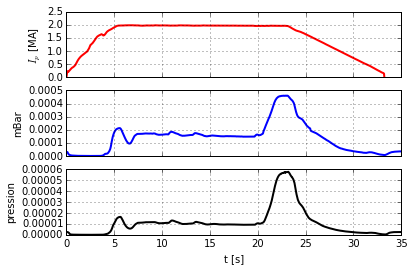

In [17]:
ax1=subplot(311)
plot(t-toffset, abs(y)/1e6, lw=2, color='r')
ylim(ymax=2.5) # it is possible to set only one parameter
ylabel('$I_p$ [MA]')
grid()
ax2=subplot(312, sharex=ax1)
plot(tbb-toffset, bb, lw=2)
ylabel("mBar")
grid()
ax3=subplot(313, sharex=ax1)
plot(tbarb-toffset, barb, lw=2, color='k')
ylabel('pression')
xlabel('t [s]')
grid()
xlim(0, 35)
# some tuning to remove the x ticks on the two first subplots
plt.setp( ax1.get_xticklabels(), visible=False)
plt.setp( ax2.get_xticklabels(), visible=False)

Un autre exemple avec des données 2D:

In [18]:
# A 2D plot example with Li beam
ne = conx.get('_sig=jet("ppf/KY6/NER", 80812)') # Li beam ne measurement
ne_R = conx.get('dim_of(_sig,0)') # major radius in meter
ne_t = conx.get('dim_of(_sig,1)') # time in second

In [19]:
# We check the shape of the output arrays
# note that np.shape(ne) or ne.shape is similar
print(ne.shape, shape(ne_R), shape(ne_t))

(494, 48) (48,) (494,)


[3.7651031017303467,
 3.8963150978088379,
 9.0099983215332031,
 19.970001220703125]

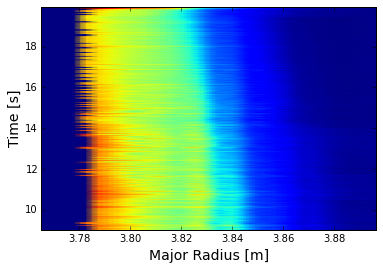

In [20]:
toffset=40 # plasma breakdown offset time
RR, tt = meshgrid(ne_R, ne_t-toffset)
pcolormesh(RR, tt, ne.value, shading='gouraud') # pcolormesh is faster and recommanded vs pcolor (from matplotlib doc)
xlabel('Major Radius [m]', fontsize=14)
ylabel('Time [s]', fontsize=14)
axis([np.min(RR), np.max(RR), np.min(tt), np.max(tt)]) # zoom in the data region

In [15]:
from IPython import utils  
from IPython.core.display import HTML  
import os  
def css_styling():  
    """Load the CSS sheet 'custom.css' located in the directory"""
    styles = "<style>\n%s\n</style>" % (open('./custom.css','r').read())
    return HTML(styles)
css_styling() 